In [3]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np

def getData(fileName):
	'''
	函数作用：读取数据
	:param fileName: 数据的路径
	:return data: data[0]数据矩阵，每一行是一个样本，每一列是一个维度
				  data[1]是数组，对应每个样本的预测值
	'''
	data = load_svmlight_file(fileName)
	row, col = data[0].shape
	oneB = np.ones(row)
	dataMatrix = np.column_stack((data[0].toarray(), oneB))
	return dataMatrix, data[1]

def divideData(dataMatrix, dataLabel):
	'''
	函数作用：将数据切分成训练集和验证集
	:param dataMatrix: 数据矩阵，每一行是一个样本，每一列是一个维度
	:param dataLabel: 数组，对应每个样本的预测值
	:return testData:
	:return trainData:
	'''
	xTrain, xTest, yTrain, yTest = train_test_split(dataMatrix, dataLabel,test_size = 0.2, random_state = 42)
	return xTrain, xTest, yTrain, yTest

def initialWeights(data, initialModel = None):
	'''
	函数作用：初始化weights
	:param data: data数据矩阵，每一行是一个样本，每一列是一个维度
	:return weight:返回weight值，array组织
	'''
	row, col = data.shape
	if initialModel == None:
		weights = np.zeros(col)
	elif initialModel == "random":
		weights = np.random.rand(col)
	elif initialModel == "normality":
		weights = np.random.standard_normal(col)
	return weights

def updataWeights(weights, D, alpha):
	'''
	函数作用：更新weights
	'''
	newWeights = weights - alpha * D
	return newWeights

def batchGradientDescent(dataMatrix, dataLabel, weights):
	'''
	函数作用：批量梯度下降
	'''
	row, col = dataMatrix.shape
	temp = getDifferenceArray(dataMatrix, dataLabel, weights)
	dataTrans = np.transpose(dataMatrix)
	temp2 = dataTrans * temp * (-1)
	G = np.mean(temp2, axis = 1)
	return G

def  plotPicture(trainLossList, testLossList):
    '''
    :param trainLossList:
    :param testLossList:
    :return:
    '''
    plt.title('loss value vary with the number of iterations')
    plt.plot(trainLossList, color="blue", linewidth=2.5, linestyle = "-", label="trainLoss")
    plt.plot(testLossList, color="red", linewidth=2.5, linestyle="-", label="testLoss")
    plt.legend(loc="upper right")
    plt.xlabel("figure3")
    plt.ylabel("loss")
    plt.show()

def svmModelCalculate(dataLabel, predictLabel):
    '''
    函数作用：计算（1-y*y^）
    :param dateLabel:样本数据的真实标签
    :param predictLabel:样本数据的预测标签
    '''
    value = dataLabel * predictLabel
    length = len(dataLabel)
    oneArrary = np.ones(length)
    value2 = oneArrary - value
    return value2

def svmModelLossFunction(dataMatrix, dataLabel, weights, C):
    '''
    函数作用：计算Loss值
    :param weights:
    :param differenceValue:
    '''
    predictValue = dataMatrix * weights
    predictLabel = predictValue.sum(axis = 1)
    differenceValue = svmModelCalculate(dataLabel, predictLabel)
    row, col = dataMatrix.shape
    tempArray = np.zeros(row)
    for i in range(row):
        if differenceValue[i] >= 0:
            tempArray[i] = differenceValue[i]
    tempValue = np.mean(tempArray) * C
    tempW = np.sum(weights * weights)/ 2
    loss = tempW + tempValue
    return loss

def getResult(weights, dataLabel, dataMatrix, threshold):
    '''
    函数作用：得到分类结果
    '''
    predictValue = dataMatrix * weights
    predictLabel = predictValue.sum(axis = 1)
    row, col = dataMatrix.shape
    resultArray = np.zeros(row)
    for i in range(row):
        if predictLabel[i] > threshold:
            resultArray[i] = 1
        else:
            resultArray[i] = -1
    return resultArray

def svmModelGradientDescent(dataMatrix, dataLabel, weights, C):
    '''
    函数作用：计算svm模型下的梯度
    :param weights:
    :param differenceValue:
    :param dataLabel:
    :param dataMatrix:
    :param C:
    '''
    predictValue = dataMatrix * weights
    predictLabel = predictValue.sum(axis = 1)
    differenceValue = svmModelCalculate(dataLabel, predictLabel)
    row, col = dataMatrix.shape
    tempValue = np.zeros(row)
    for i in range(row):
        if differenceValue[i] >= 0:
            tempValue[i] = dataLabel[i]
    tempG = np.transpose(dataMatrix) * tempValue * (-1)
    G = np.mean(tempG, axis = 1) * C + weights
    return G

def svmModelClassification():
    dataFileName = './australianSacled.txt'
    dataMatrix,dataLabel = getData(dataFileName)
    xTrain, xTest, yTrain, yTest = divideData(dataMatrix, dataLabel)
    weights = initialWeights(dataMatrix, initialModel = None)
    lossTrainList = []
    lossTestList = []
    iterNum = 100
    for i in range(iterNum):
        trainLoss = svmModelLossFunction(xTrain, yTrain,weights, C=1)
        lossTrainList.append(trainLoss)
        testLoss = svmModelLossFunction(xTest, yTest,weights, C=1)
        lossTestList.append(testLoss)
        D = svmModelGradientDescent(xTrain, yTrain,weights, C=1)
        weights = updataWeights(weights, D, 0.01)
    plotPicture(lossTrainList, lossTestList)
    print(xTrain.shape)
    print(xTest.shape)

def  plotPicture2(testLossList0, testLossList1, testLossList2, testLossList3, testLossList4):
    '''
    :param trainLossList:
    :param testLossList:
    :return:
    '''
    plt.title('loss value vary with the number of iterations')
    plt.plot(testLossList0, color="blue", linewidth=2.5, linestyle = "-", label="learn-rate=0.01")
    plt.plot(testLossList1, color="red", linewidth=2.5, linestyle="-", label="learn-rate=0.05")
    plt.plot(testLossList2, color="green", linewidth=2.5, linestyle="-", label="learn-rate=0.1")
    plt.plot(testLossList3, color="black", linewidth=2.5, linestyle="-", label="learn-rate=0.2")
    plt.plot(testLossList4, color="yellow", linewidth=2.5, linestyle="-", label="learn-rate=0.8")
    plt.ylim(ymin=0, ymax = 1.5)
    plt.legend(loc="upper right")
    plt.xlabel("figure4")
    plt.ylabel("loss")
    plt.show()

def svmModelClassification2():
    '''
    主体函数
    '''
    dataFileName = './australianSacled.txt'
    dataMatrix,dataLabel = getData(dataFileName)
    xTrain, xTest, yTrain, yTest = divideData(dataMatrix, dataLabel)
    weights = initialWeights(dataMatrix, initialModel = None)
    weights2 = initialWeights(dataMatrix, initialModel = None)
    weights3 = initialWeights(dataMatrix, initialModel = None)
    weights4 = initialWeights(dataMatrix, initialModel = None)
    weights0 = initialWeights(dataMatrix, initialModel = None)
    lossTestList0 = []
    lossTestList = []
    lossTestList2 = []
    lossTestList3 = []
    lossTestList4 = []
    iterNum = 10
    learningRate0 = 0.01
    learningRate1 = 0.05
    learningRate2 = 0.1
    learningRate3 = 0.2
    learningRate4 = 0.8
    for i in range(iterNum):
        #learningRate0
        testLoss0 = svmModelLossFunction(xTest, yTest, weights0,1)
        lossTestList0.append(testLoss0)
        D = svmModelGradientDescent(xTrain, yTrain, weights0,1)
        weights0 = updataWeights(weights0, D, learningRate0)
        #learningRate1
        testLoss = svmModelLossFunction(xTest, yTest, weights,1)
        lossTestList.append(testLoss)
        D = svmModelGradientDescent(xTrain, yTrain, weights,1)
        weights = updataWeights(weights, D, learningRate1)
        #learningRate2
        testLoss2 = svmModelLossFunction(xTest, yTest, weights2,1)
        lossTestList2.append(testLoss2)
        D = svmModelGradientDescent(xTrain, yTrain, weights2,1)
        weights2 = updataWeights(weights2, D, learningRate2)
        #learningRate3
        testLoss3 = svmModelLossFunction(xTest, yTest, weights3,1)
        lossTestList3.append(testLoss3)
        D = svmModelGradientDescent(xTrain, yTrain, weights3,1)
        weights3 = updataWeights(weights3, D, learningRate3)
        #learningRate4
        testLoss4 = svmModelLossFunction(xTest, yTest, weights4,1)
        lossTestList4.append(testLoss4)
        D = svmModelGradientDescent(xTrain, yTrain, weights4,1)
        weights4 = updataWeights(weights4, D, learningRate4)
    plotPicture2(lossTestList0,lossTestList,lossTestList2,lossTestList3,lossTestList4)

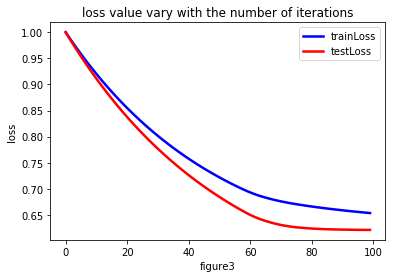

(552, 15)
(138, 15)


In [4]:
svmModelClassification()

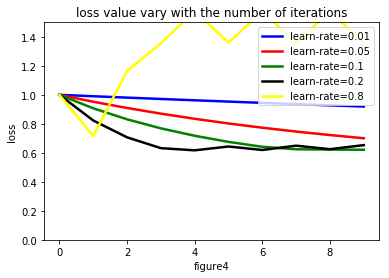

In [5]:
svmModelClassification2()